<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Optimization%20Algorithms/Sigmoid%20Neuron/Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np

In [2]:
class SN:
  
  def __init__(self, w_init, b_init, algo):
    self.w = w_init
    self.b = b_init
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.algo = algo
    
  def sigmoid(self, x, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    return 1. / (1. + np.exp(-(w*x + b)))
  
  def error(self, X, Y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    err = 0
    for x, y in zip(X, Y):
      err += 0.5 * (self.sigmoid(x, w, b) - y) ** 2
    return err
  
  def grad_w(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def gradient_descent(self,eta, epochs,X,Y):
    m = X.shape[0]
    for epoch in range(epochs):
      dw, db = 0, 0
      for x, y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= eta* dw/m 
      self.b -= eta* db/m
      self.append_log()
  
  def gradient_momentum(self,eta,gamma,epochs,X,Y):
    v_w, v_b = 0, 0
    for epoch in range(epochs):
      dw, db = 0, 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      v_w = gamma * v_w + eta * dw 
      v_b = gamma * v_b + eta * db
      self.w = self.w - v_w
      self.b = self.b - v_b
      self.append_log()
  
  def gradient_mini_btach(self,mini_batch_size,eta, epochs,X,Y):
    for epoch in range(epochs):
      dw, db = 0, 0
      points_seen = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
        points_seen += 1
        if points_seen % mini_batch_size == 0:
          self.w -= eta * dw / mini_batch_size
          self.b -= eta * db / mini_batch_size
          self.append_log()
          dw, db = 0, 0

  def gradient_nesterov(self,eta,gamma,epochs,X,Y):
    v_w, v_b = 0, 0
    for epoch in range(epochs):
      dw, db = 0, 0
      v_w = gamma * v_w
      v_b = gamma * v_b
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y, self.w - v_w, self.b - v_b)
        db += self.grad_b(x, y, self.w - v_w, self.b - v_b)
      v_w = v_w + eta * dw
      v_b = v_b + eta * db
      self.w = self.w - v_w
      self.b = self.b - v_b
      self.append_log()


  def fit(self, X, Y, epochs=100, eta=0.01, gamma=0.9, mini_batch_size=100, eps=1e-8,beta=0.9, beta1=0.9, beta2=0.9):
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.X = X
    self.Y = Y
    
    if self.algo == 'GD':
      self.gradient_descent(eta,epochs,X,Y)
        
    elif self.algo == 'MiniBatch':
      self.gradient_mini_btach(mini_batch_size,eta, epochs,X,Y)
        
    elif self.algo == 'Momentum':
      self.gradient_momentum(eta,gamma,epochs,X,Y)
    
    elif self.algo == 'NAG':
      self.gradient_nesterov(eta,gamma,epochs,X,Y)
      
        
  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X, self.Y))

In [3]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

algo = 'MiniBatch'

w_init = 2.1
b_init = 4.0

w_min = -7
w_max = 5

b_min = -7
b_max = 5

epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5

animation_frames = 20

plot_2d = True
plot_3d = False

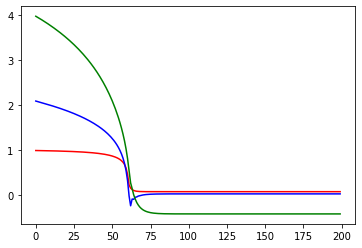

In [4]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.show()

In [5]:
def plot_animate_3d(i):
  i = int(i*(epochs/animation_frames))
  line1.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  line1.set_3d_properties(sn.e_h[:i+1])
  line2.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  line2.set_3d_properties(np.zeros(i+1) - 1)
  title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn.e_h[i]))
  return line1, line2, title

In [6]:
if plot_3d: 
  W = np.linspace(w_min, w_max, 256)
  b = np.linspace(b_min, b_max, 256)
  WW, BB = np.meshgrid(W, b)
  Z = sn.error(X, Y, WW, BB)

  fig = plt.figure(dpi=100)
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
  ax.set_xlabel('w')
  ax.set_xlim(w_min - 1, w_max + 1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min - 1, b_max + 1)
  ax.set_zlabel('error')
  ax.set_zlim(-1, np.max(Z))
  ax.view_init (elev=25, azim=-75) # azim = -20
  ax.dist=12  
  title = ax.set_title('Epoch 0')

In [7]:
if plot_3d: 
  i = 0
  line1, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], sn.e_h[:i+1], color='black',marker='.')
  line2, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], np.zeros(i+1) - 1, color='red', marker='.')
  anim = animation.FuncAnimation(fig, func=plot_animate_3d, frames=animation_frames)
  rc('animation', html='jshtml')
  anim

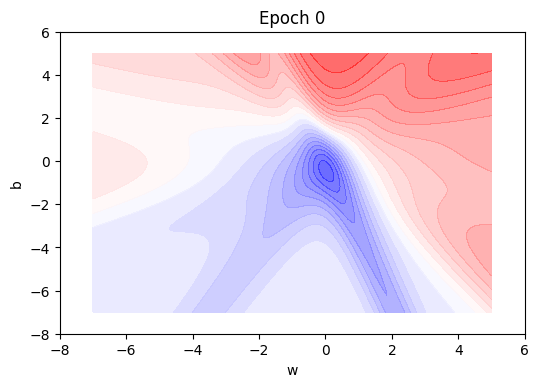

In [8]:
if plot_2d: 
  W = np.linspace(w_min, w_max, 256)
  b = np.linspace(b_min, b_max, 256)
  WW, BB = np.meshgrid(W, b)
  Z = sn.error(X, Y, WW, BB)

  fig = plt.figure(dpi=100)
  ax = plt.subplot(111)
  ax.set_xlabel('w')
  ax.set_xlim(w_min - 1, w_max + 1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min - 1, b_max + 1)
  title = ax.set_title('Epoch 0')
  cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
  plt.show()

In [9]:
def plot_animate_2d(i):
  i = int(i*(epochs/animation_frames))
  line.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn.e_h[i]))
  return line, title

In [10]:
if plot_2d: 
  i = 0
  line, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], color='black',marker='.')
  anim = animation.FuncAnimation(fig, func=plot_animate_2d, frames=animation_frames)
  rc('animation', html='jshtml')
  anim

In [11]:
if algo == 'GD':
  print('algo = {}, eta = {}'.format(algo, eta))
elif algo == 'Momentum' or algo == 'NAG':
  print('algo = {}, eta = {}, gamma = {}'.format(algo, eta, gamma))
elif algo == 'MiniBatch':
  print('algo = {}, eta = {}, batch size = {}'.format(algo, eta, mini_batch_size))
elif algo == 'AdaGrad' or algo == 'RMSProp':
  print('algo = {}, eta = {}, eps = {}'.format(algo, eta, eps))
anim

algo = MiniBatch, eta = 5, batch size = 6
